<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/Fall2025/Week3/grades_create_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(0)

# Number of students (data points)
n = 100

# Generate random exam scores between 50 and 95 for n students
exams = np.random.uniform(50, 95, n)

# Generate random assignment scores between 75 and 100 for n students
# Assignments are a little easier I guess
assignments = np.random.uniform(75, 100, n)

# Generate random class participation scores between 0 and 100 for n students (treated as noise)
class_participation = np.random.normal(70, 15, n) #lets generate it like a bell shape around 70 points
class_participation = np.clip(class_participation, 0, 100)

# Assume some "unknown" weights the professor might have used for grading
weight_exam = 0.7
weight_assignment = 0.2
weight_participation = 0.1

# Generate the final grade based on the random scores and weights
# Class participation acts as noise here
curve = 10  # to make sure students get higher letter grades, nice professor :)
weighted_grade = (weight_exam * exams +
              weight_assignment * assignments +
              weight_participation * class_participation +
              curve)

# Round to keep it realistic
weighted_grade = np.round(weighted_grade, 2)

weighted_grade = np.minimum(100, weighted_grade)

# Create a Pandas DataFrame
# Note: We're not including 'Class_Participation' as it's considered as noise
# Students compile a dataset by asking each other what grades they received in exams/assignments.
df = pd.DataFrame({
    'Exams': exams,
    'Assignments': assignments,
    'weighted_grade': weighted_grade
})

# Display first few rows of the DataFrame
print(df.head(10))


       Exams  Assignments  weighted_grade
0  74.696608    91.945413           89.37
1  82.183521    81.750199           89.26
2  77.124352    93.379851           87.94
3  74.519743    99.054714           88.32
4  69.064466    81.218829           80.84
5  79.065235    89.403933           93.12
6  69.691425    89.801048           85.17
7  90.129785    89.306298           98.08
8  93.364824    80.577041           96.63
9  67.254868    98.818725           85.11


In [ ]:
np.max(weighted_grade)

np.float64(100.0)

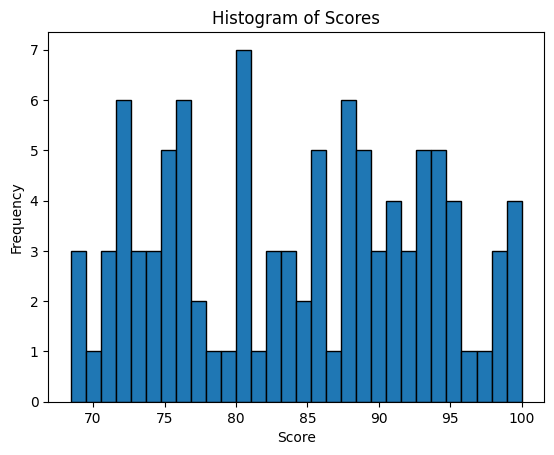

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(weighted_grade, bins=30, edgecolor='black')
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Histogram of Scores")
plt.show()


In [ ]:
# Function to assign letter grade
def get_letter_grade(score):
    if score >= 90: return "A"
    elif score >= 80: return "B"
    elif score >= 70: return "C"
    elif score >= 60: return "D"
    else: return "F"

# Add letter grade column
df['Letter_Grade'] = df['weighted_grade'].apply(get_letter_grade)

print(df.head(10))

# Save
df.to_csv('grades_dataset.csv', index=False)


       Exams  Assignments  weighted_grade Letter_Grade
0  74.696608    91.945413           89.37            B
1  82.183521    81.750199           89.26            B
2  77.124352    93.379851           87.94            B
3  74.519743    99.054714           88.32            B
4  69.064466    81.218829           80.84            B
5  79.065235    89.403933           93.12            A
6  69.691425    89.801048           85.17            B
7  90.129785    89.306298           98.08            A
8  93.364824    80.577041           96.63            A
9  67.254868    98.818725           85.11            B


In [ ]:
df

,Exams,Assignments,weighted_grade,Letter_Grade
0,74.696608,91.945413,89.37,B
1,82.183521,81.750199,89.26,B
2,77.124352,93.379851,87.94,B
3,74.519743,99.054714,88.32,B
4,69.064466,81.218829,80.84,B
...,...,...,...,...
95,58.243611,87.261470,74.36,C
96,76.393082,80.685366,86.83,B
97,50.904840,81.358912,68.43,D
98,87.302301,76.450729,94.44,A
